In [16]:
import os, sys
import subprocess
import matplotlib.pyplot as plt
import numpy as np
import re

FOLDER_PATH = os.path.abspath("")
sys.path.append(os.path.join(FOLDER_PATH, '../..'))
from acquire_color_list import color_list

# Load and parse pose data from files
def load_pose_sequence(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    timestamps = []
    x_positions = []
    y_positions = []
    z_positions = []

    for line in lines:
        parts = re.split('\s+', line.strip())
        if float(parts[0]) - 1.685076e9 > 200:
            break
        timestamps.append(float(parts[0]))
        x_positions.append(float(parts[1]))
        y_positions.append(float(parts[2]))
        z_positions.append(float(parts[3]))

    timestamps = np.array(timestamps)
    timestamps -= 1.685076e9
    # timestamps = timestamps[timestamps <= 200]
    
    #timestamps -= timestamps[0]     
    return timestamps, np.array(x_positions), np.array(y_positions), np.array(z_positions)

# Load pose sequences
ts1, x1, y1, z1 = load_pose_sequence(os.path.join(FOLDER_PATH, 'handheld_escalator00_resampled_aligned.txt'))
ts2, x2, y2, z2 = load_pose_sequence(os.path.join(FOLDER_PATH, 'handheld_escalator00_fastlio2_aligned.txt'))

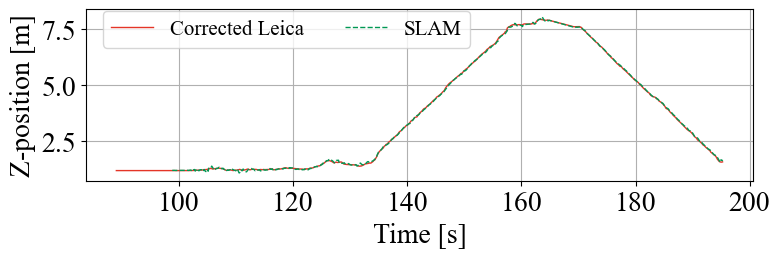

In [17]:
def plot_z_trajectory(ts1, z1, ts2, z2):
    # Set the font to Times New Roman
    plt.rcParams['font.size'] = 20
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['font.weight'] = 'normal'
    plt.rcParams['axes.labelweight'] = 'normal'
    plt.rcParams['axes.titleweight'] = 'normal'

    plt.figure(figsize=(8, 3))  # Set the size of the figure
    plt.plot(ts1, z1, label='Corrected Leica', linewidth=1, color=color_list[0][:3])  # Plot the Z trajectory of the first sequence
    plt.plot(ts2, z2, label='SLAM', linestyle='--', linewidth=1, color=color_list[1][:3])  # Plot the Z trajectory of the second sequence
    
    #plt.title('Z Axis Trajectory Comparison')  # Set the title of the figure
    plt.xlabel('Time [s]')  # Set the label for the x-axis
    plt.ylabel('Z-position [m]')  # Set the label for the y-axis
    plt.legend(loc='upper left', ncol=2, fontsize=15, bbox_to_anchor=(0.01, 1.05))  # Display the legend
    plt.grid(True)  # Display grid lines
    plt.tight_layout()  # Automatically adjust subplot parameters to give specified padding
    plt.savefig(os.path.join(FOLDER_PATH, 'alignment_w_alignment.pdf'), dpi=400, format='pdf')
    plt.show()

# Call the function to plot the graph
plot_z_trajectory(ts1, z1, ts2, z2)